https://www.reddit.com/r/askSingapore/comments/vlystj/what_are_dating_profiles_that_get_an_instant/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [2]:
df_female = pd.read_csv('okc_female.csv')
df_male = pd.read_csv('okc_male.csv')

In [3]:
df_male.head
df_female.head

<bound method NDFrame.head of       Unnamed: 0        name age  \
0              0   Christine  23   
1              1      Sheryl  23   
2              2       shuen  20   
3              3        Jazz  18   
4              4     Melanie  20   
...          ...         ...  ..   
9977        9977  Tiffany Ho  22   
9978        9978        Moka  23   
9979        9979        Jash  18   
9980        9980       Azlin  24   
9981        9981    Nathalia  27   

                                           self_summary  New Friends  \
0                                Live fast, live young.         True   
1     Easy-going and spontaneous. Hmu and let’s see ...         True   
2                                just for fun @leshuenn         True   
3                                 Just wanna have fun 😏        False   
4     doggo looking at u like a snacc🤪  i look tall ...         True   
...                                                 ...          ...   
9977  I am interested to do Hair 

In [4]:
df_male.columns
df_female.columns

Index(['Unnamed: 0', 'name', 'age', 'self_summary', 'New Friends',
       'Short-term dating', 'Long-term dating', 'Hookups'],
      dtype='object')

In [5]:
rs = ['Short-term dating', 'Long-term dating', 'New Friends', 'Hookups']
data_male_rs = []

for i in rs:
    
    numOfTrue = df_male[i].value_counts()[True]
    numOfFalse = df_male[i].value_counts()[False]
    percentageOfTrue = numOfTrue/(numOfFalse+numOfTrue) *100
    
    data = {"Wants":numOfTrue , "Do not want": numOfFalse, "Percentage wants": percentageOfTrue}
    
    data_male_rs.append(data)
    
df_male_rs = pd.DataFrame(data_male_rs, index = rs)
df_male_rs


,Wants,Do not want,Percentage wants
Short-term dating,7089,2887,71.060545
Long-term dating,7702,2274,77.205293
New Friends,7667,2309,76.854451
Hookups,4949,5027,49.609062


<AxesSubplot:>

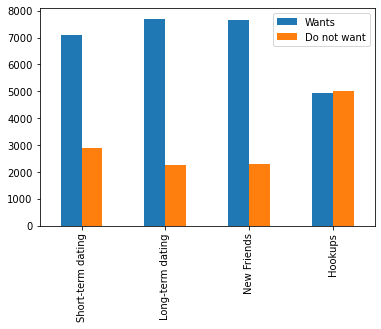

In [6]:
no_percentage_male = df_male_rs.drop(columns = 'Percentage wants')
no_percentage_male.plot(kind = "bar")

In [7]:
rs = ['Short-term dating', 'Long-term dating', 'New Friends', 'Hookups']
data_female_rs = []

for i in rs:
    
    numOfTrue = df_female[i].value_counts()[True]
    numOfFalse = df_female[i].value_counts()[False]
    percentageOfTrue = numOfTrue/(numOfFalse+numOfTrue) *100
    
    data = {"Wants":numOfTrue , "Do not want": numOfFalse, "Percentage wants": percentageOfTrue}
    
    data_female_rs.append(data)
    
df_female_rs = pd.DataFrame(data_female_rs, index = rs)
df_female_rs

,Wants,Do not want,Percentage wants
Short-term dating,4625,5357,46.333400
Long-term dating,7428,2554,74.413945
New Friends,8149,1833,81.636947
Hookups,766,9216,7.673813


<AxesSubplot:>

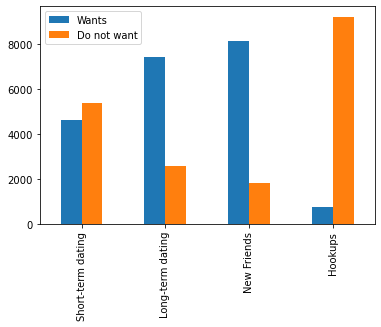

In [8]:
no_percentage_female = df_female_rs.drop(columns = 'Percentage wants')
no_percentage_female.plot(kind = "bar")

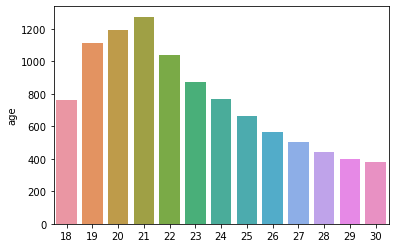

In [9]:
df_female_cleaned = df_female[df_female['age'] != "Si"] #Remove invalid data
age_female = df_female_cleaned.age.value_counts().sort_index()
# print(age_female.index)
chart = sns.barplot(x = age_female.index, y = age_female)
plt.show()

Bar plot for females of different age groups


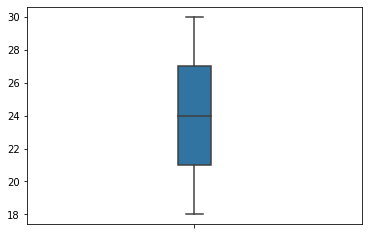

In [10]:
print("Bar plot for females of different age groups")

chart_1 = sns.boxplot(y = age_female.index.astype('int64'), width=0.1)

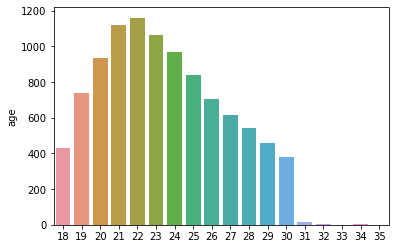

In [11]:
age_male = df_male.age.value_counts().sort_index()

chart = sns.barplot(x = age_male.index, y = age_male)

plt.show()

Bar plot for males of different age groups


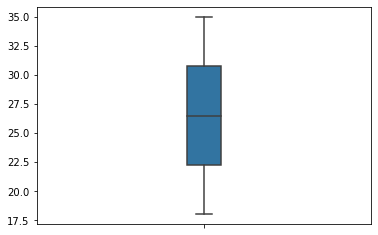

In [12]:
print("Bar plot for males of different age groups")
chart_2 = sns.boxplot(y = age_male.index, width=0.1)

In [13]:
numOfNullSummary_female = (df_female['self_summary'].isnull()).sum()
numOfSelfSummary_female = len(df_female) - numOfNullSummary_female

print("There are " + str(numOfSelfSummary_female) + " self summary done by female.")
print("There are " + str(numOfNullSummary_female) + " self summary left blank by female.")

There are 9222 self summary done by female.
There are 760 self summary left blank by female.


In [14]:
numOfNullSummary_male = (df_male['self_summary'].isnull()).sum()
numOfSelfSummary_male = len(df_male) - numOfNullSummary_male

print("There are " + str(numOfSelfSummary_male) + " self summary done by male.")
print("There are " + str(numOfNullSummary_male) + " self summary left blank by male.")

There are 9250 self summary done by male.
There are 726 self summary left blank by male.


In [15]:
print("Top 20 self summary by females")
df_female['self_summary'].value_counts()[:20]

Top 20 self summary by females


-              45
.              44
hi             42
Hi             36
:)             19
Hello          14
hello          13
😊               8
i like cats     6
Nothing         6
Hello!          5
Friendly        5
Hello :)        4
hello!          4
hii             4
🤍               4
…               4
Idk             4
Introvert       4
Simple          4
Name: self_summary, dtype: int64

In [16]:
print("Top 20 self summary by males")

df_male['self_summary'].value_counts()[:20]

Top 20 self summary by males


.               29
hi              29
Hi              26
-               12
:)              11
Hello           11
🇸🇬               7
Hey              6
Just for fun     5
😊                4
huh              4
Yo               3
180cm            3
Helloo           3
Hi!              3
Hi there         3
✌️               3
Hola             3
:D               3
tired            3
Name: self_summary, dtype: int64

In [34]:
def lowercase(x):
    return x.lower()

df_female_withSummary = df_female[df_female['self_summary'].notnull()]

contain_values = df_female_withSummary[df_female_withSummary['self_summary'].apply(lowercase).str.contains('family')]
print(contain_values[:5])
print(len(contain_values))

     Unnamed: 0      name age  \
70           70      Anna  21   
181         181       wyn  23   
308         308   Carissa  21   
591         591     Erica  26   
676         676  Meredith  26   

                                          self_summary  New Friends  \
70   bookworm, love cute things. If u like chaotic ...         True   
181  three truth one lie, let’s go! - never been in...        False   
308  21 year old dying uni student 😵‍💫 i love sitco...         True   
591  I’m someone who prioritise family time, have a...         True   
676  5ft of feisty INFJ. My family’s nickname for m...        False   

     Short-term dating  Long-term dating  Hookups  length of self summary  
70               False              True    False                      29  
181              False              True    False                      70  
308              False              True    False                      55  
591              False              True    False                     

In [18]:
df_male_withSummary = df_male[df_male['self_summary'].notnull()]
contain_values = df_male_withSummary[df_male_withSummary['self_summary'].apply(lowercase).str.contains('foodie')]
print(len(contain_values))

94


In [19]:
def f(x):
    if type(x) != float:
        return len(x)
    else:
        return 0

df_female['length of self summary'] = df_female['self_summary'].str.split(" ").apply(f)
df_male['length of self summary'] = df_male['self_summary'].str.split(" ").apply(f)

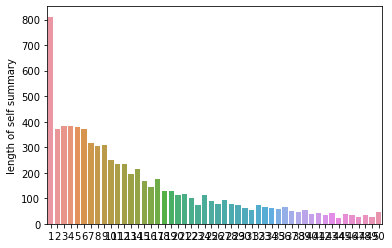

In [20]:
length_self_summary_female = df_female['length of self summary'].value_counts().sort_index()

chart_2 = sns.barplot(x = length_self_summary_female.index[1:51], y = length_self_summary_female[1:51])

plt.show()

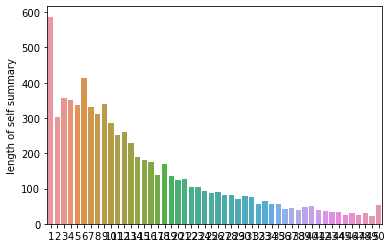

In [21]:
length_self_summary_male = df_male['length of self summary'].value_counts().sort_index()

chart_3 = sns.barplot(x = length_self_summary_male.index[1:51], y = length_self_summary_male[1:51])

plt.show()

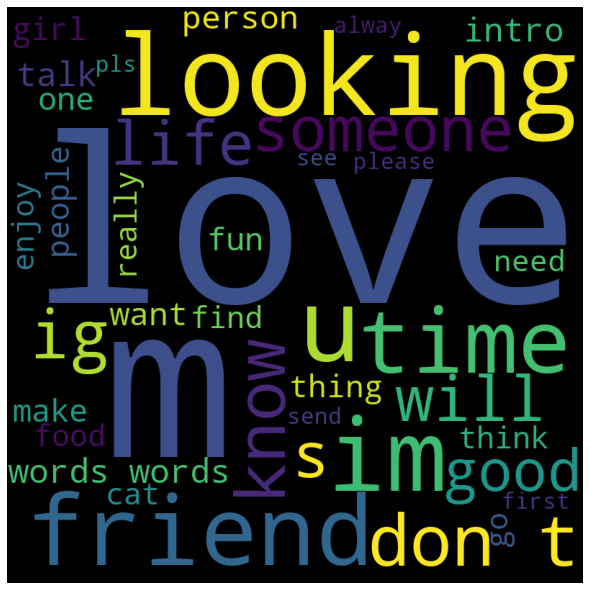

In [22]:
words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_female_withSummary.self_summary:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                max_words = 40,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

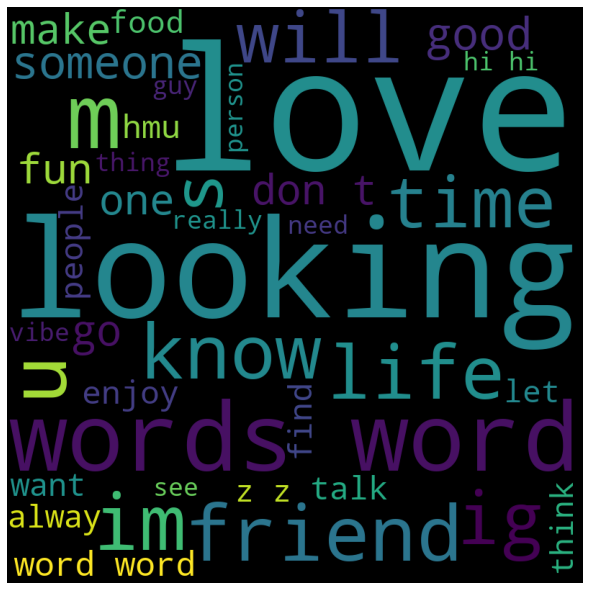

In [23]:
words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_male_withSummary.self_summary:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                max_words = 40,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)